EDA

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_accidents= pd.read_csv('Datasets\df_road_accidents.csv', encoding='utf-8')
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             717 non-null    object 
 1   Role           717 non-null    object 
 2   Gender         717 non-null    object 
 3   Age            717 non-null    int64  
 4   Date of death  648 non-null    object 
 5   Age range      717 non-null    object 
 6   Num victims    717 non-null    int64  
 7   Date           702 non-null    object 
 8   Day            702 non-null    float64
 9   Hr             701 non-null    float64
 10  Street Tipe    702 non-null    object 
 11  Street         702 non-null    object 
 12  Croos          540 non-null    object 
 13  Commune        702 non-null    object 
 14  Pos X          702 non-null    float64
 15  Pos Y          702 non-null    float64
 16  Victim         702 non-null    object 
 17  Accused        702 non-null    object 
 18  X coordina

1.- Distribution and Frequency:

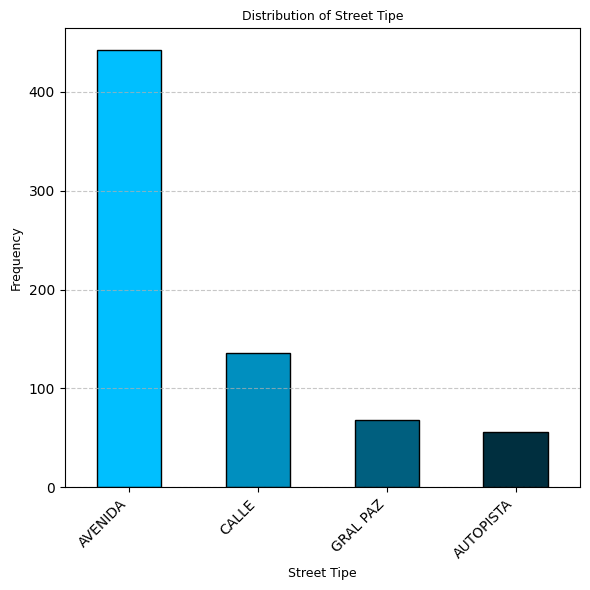

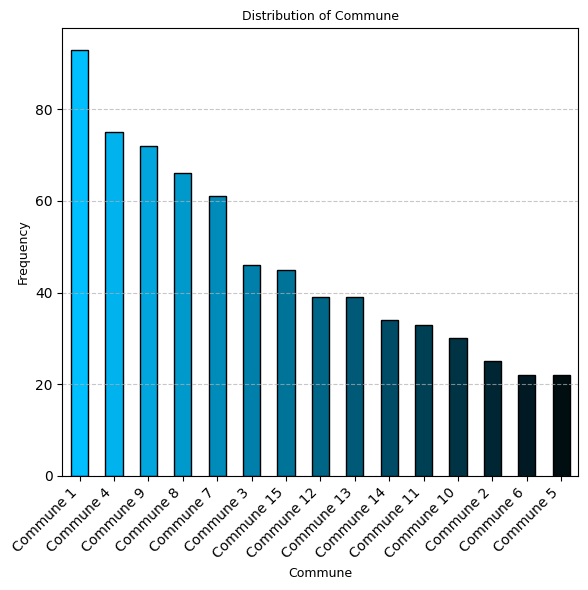

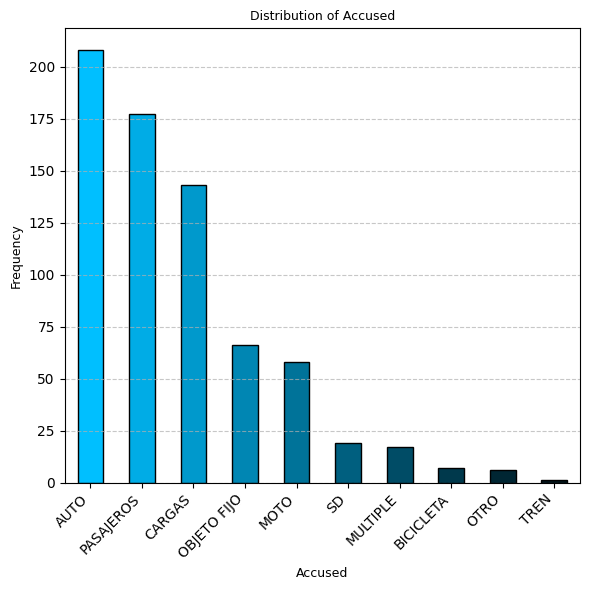

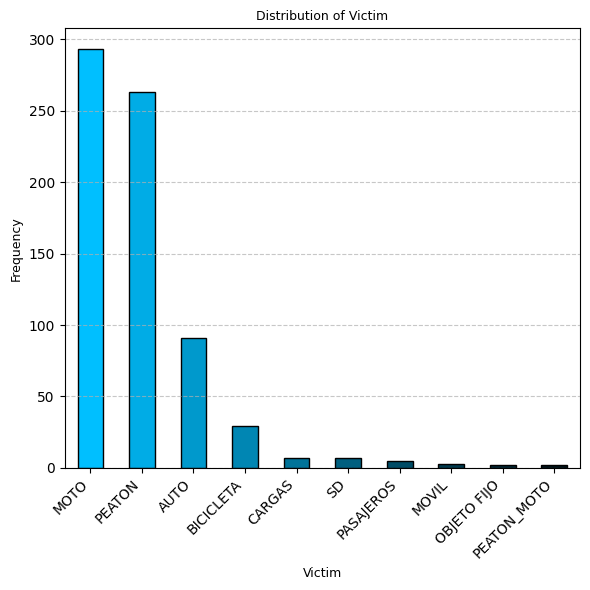

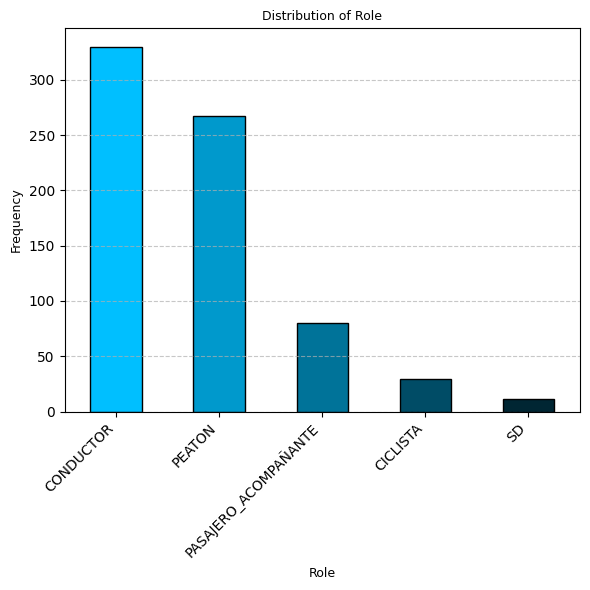

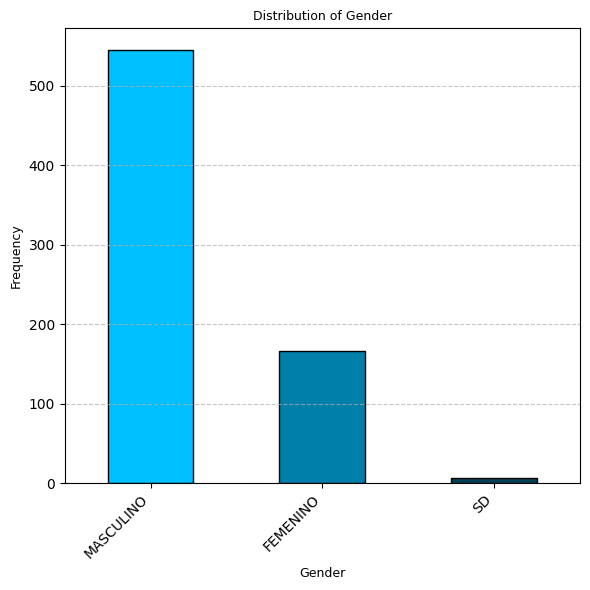

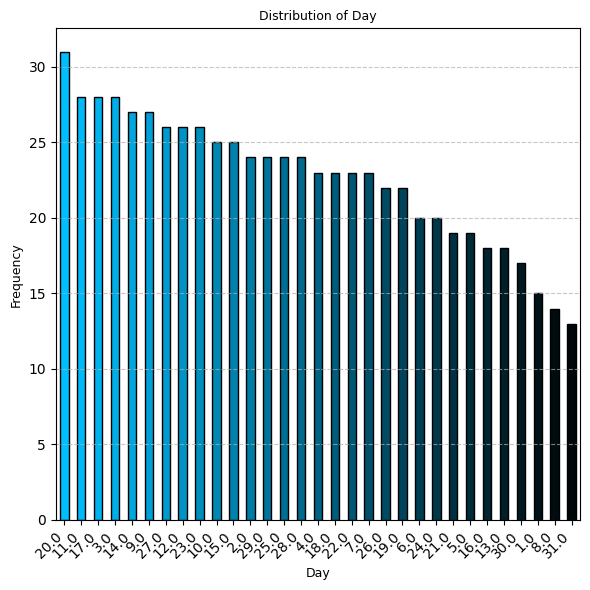

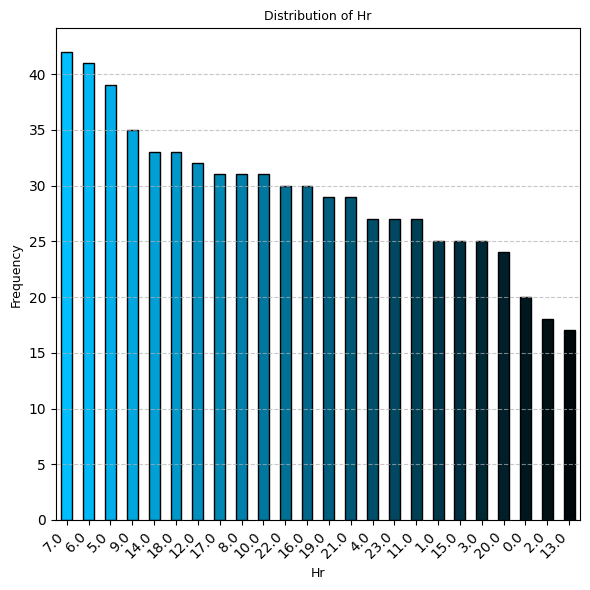

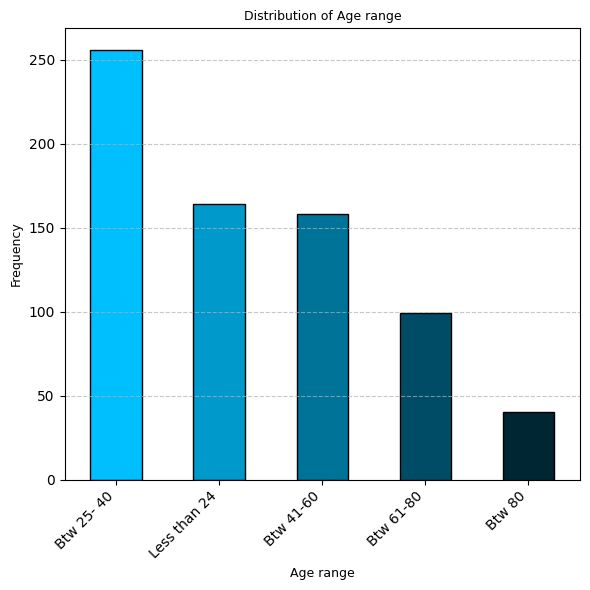

In [3]:
columns = ["Street Tipe", "Commune", "Accused", "Victim", "Role", "Gender", "Day", "Hr", "Age range"]

for col in columns:
    value_counts = df_accidents[col].value_counts()
    
    plt.figure(figsize=(6, 6)) 
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])
    value_counts.plot(kind='bar', color=[cmap(i / len(value_counts)) for i in range(len(value_counts))], edgecolor='#000000')
    
    plt.title("Distribution of " + str(col), fontsize=9)
    
    plt.xlabel(col, fontsize=9) 
    plt.ylabel("Frequency", fontsize=9)  
    plt.xticks(rotation=45, ha='right') 

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  
    plt.show()
  

Here is a formal rephrasing of your conclusions with some additional insights about data science:

High-Risk Avenues: The significant occurrence of incidents on avenues underscores the need to assess and enhance safety on these primary city arteries. This could involve specific road design measures and traffic regulations, highlighting the power of data-driven urban planning.

Stability in Daily Distribution: The consistency in the number of incidents per day suggests that incidents are not concentrated on specific days, indicating the necessity for continuous focus on road safety rather than targeting particular days of the week. This insight demonstrates the importance of temporal analysis in data science.

Critical Hours: The frequent road incidents in the early morning hours necessitate specific measures to mitigate risks during this period. This could include awareness campaigns and reinforced patrolling, emphasizing the role of predictive analytics in identifying high-risk time slots.

Geographical Location: Comuna 1, comprising the neighborhoods of San Nicolás, Monserrat, San Telmo, and Retiro, stands out for the highest number of incidents. This area represents the city center, indicating that the geographical zone with the highest accident rate is the city center. This finding underscores the value of geospatial analysis in data science.

Victim Profile: The majority of victims being men may indicate the need for targeted approaches to promote road safety among this demographic group, such as specific education campaigns. This highlights the importance of demographic analysis in understanding and addressing road safety issues.

Roles of Victims: The identification of vehicle drivers and pedestrians as the main victims underscores the importance of protecting these groups and promoting responsible behavior on public roads. This insight shows the value of role-based analysis in developing targeted safety measures.

Types of Vehicles Involved: The predominant involvement of cars, passenger transport, and cargo transport in incidents underscores the need for specific supervision and regulation for these types of vehicles, as well as the promotion of safe driving practices. This finding highlights the importance of vehicle type analysis in understanding and addressing road safety issues.

These findings are crucial in guiding future road safety actions and policies in Buenos Aires. Continuous data analysis and the implementation of specific measures based on these results can significantly contribute to reducing road incidents and protecting citizens’ lives. This conclusion emphasizes the critical role of data science in informing and shaping public safety policies.

2.- Distribution of number of victims per incident:

In [4]:
df_accidents["Num victims"].describe()

count    717.000000
mean       1.037657
std        0.294226
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num victims, dtype: float64

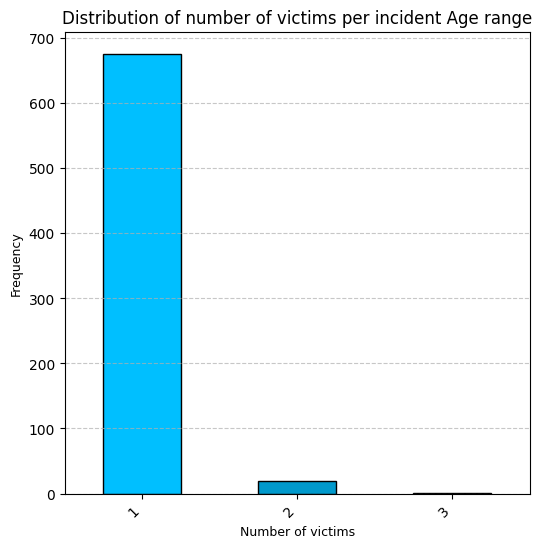

In [5]:
id_counts = df_accidents['Id'].value_counts()
frequency_counts = id_counts.value_counts().sort_index()

plt.figure(figsize=(6, 6))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])
frequency_counts.plot(kind='bar', color=[cmap(i / len(value_counts)) for i in range(len(value_counts))], edgecolor='#000000')
plt.title("Distribution of number of victims per incident " + str(col), fontsize=12)

plt.xlabel("Number of victims", fontsize=9) 
plt.ylabel('Frequency', fontsize=9)  

plt.xticks(rotation=45, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The majority of road accidents predominantly result in a single casualty, typically the vehicle operator or a pedestrian. Incidents resulting in more than one, and never exceeding three casualties, are statistically infrequent. This pattern suggests that a significant proportion of accidents are of lesser severity, potentially involving minor collisions or incidents where only one individual is directly impacted.

This data has substantial implications for the planning and allocation of emergency resources. It enables healthcare and rescue services to optimize their preparedness and response strategies for predominantly single-victim incidents. However, it’s imperative to acknowledge that exceptions do occur. Incidents involving two or three casualties necessitate a more detailed examination to comprehend the surrounding circumstances and consider additional safety and preventative measures.

The data pertaining to the number of casualties per incident can significantly inform the strategic focus of authorities and road safety organizations. It can guide efforts towards accident prevention and the promotion of safe driving practices. Moreover, this data can be instrumental in educational and awareness campaigns, emphasizing the importance of individual responsibility and fostering a culture of road safety.

In conclusion, this analysis not only provides valuable insights into the nature and impact of road accidents but also underscores the critical role of data in shaping effective and informed road safety strategies. As data analysts, we must continue to leverage this data to enhance our understanding, inform our strategies, and ultimately contribute to the reduction of road accidents and the safeguarding of lives.

3.- Distribution of days until death

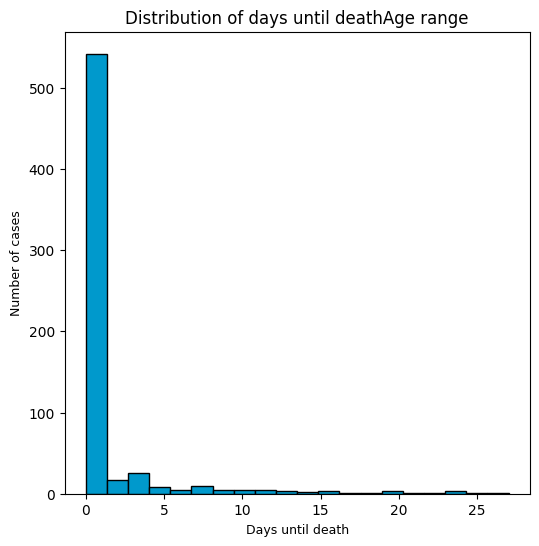

In [6]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Date of death'] = pd.to_datetime(df_accidents['Date of death'])
df_accidents['Day_Diff'] = (df_accidents['Date of death'] - df_accidents['Date']).dt.days

df_accidents['Day_Diff'] = df_accidents['Day_Diff'].fillna(np.nan)  # Convert 'SD' to NaN

plt.figure(figsize=(6, 6))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])

plt.title("Distribution of days until death" + str(col), fontsize=12)
plt.hist(df_accidents['Day_Diff'].dropna(), bins=20, color=cmap(.2), edgecolor='#000000')
plt.xlabel('Days until death', fontsize=9) 
plt.ylabel('Number of cases', fontsize=9)  

plt.show()
df_accidents.drop(columns='Day_Diff', inplace=True)


Incident Severity: The fact that most victims die either instantly or within the day underscores the severity of these road incidents. This highlights the need for effective traffic control and prevention measures to reduce fatal accidents.

Immediate Medical Attention: Immediate and emergency medical care is critical in severe road incidents. Quick response services and nearby medical facilities play a vital role in victim survival, emphasizing the importance of healthcare accessibility in emergency situations.

Serious Injuries: Beyond immediate fatalities, it’s crucial to consider severe injuries resulting from road incidents. The extended hospitalization period before death indicates the need for long-term treatment and care for victims of severe road accidents, also pointing to the associated costs.

Prevention and Education: Prevention remains key to addressing this issue. Road safety education campaigns, stricter traffic regulations, and promoting safe driving behaviors can significantly reduce fatal road incidents and severe injuries.

Detailed Investigation: Cases where victims die after an extended hospitalization period warrant a detailed investigation to understand the circumstances leading to such outcomes. This can help identify specific areas for improvement in emergency medical care and severe injury treatment. At the same time, the lack of values in this field underscores the need to improve the traceability of the victim within the healthcare system.

4.- Heatmap: incidents by day of the week and time slot

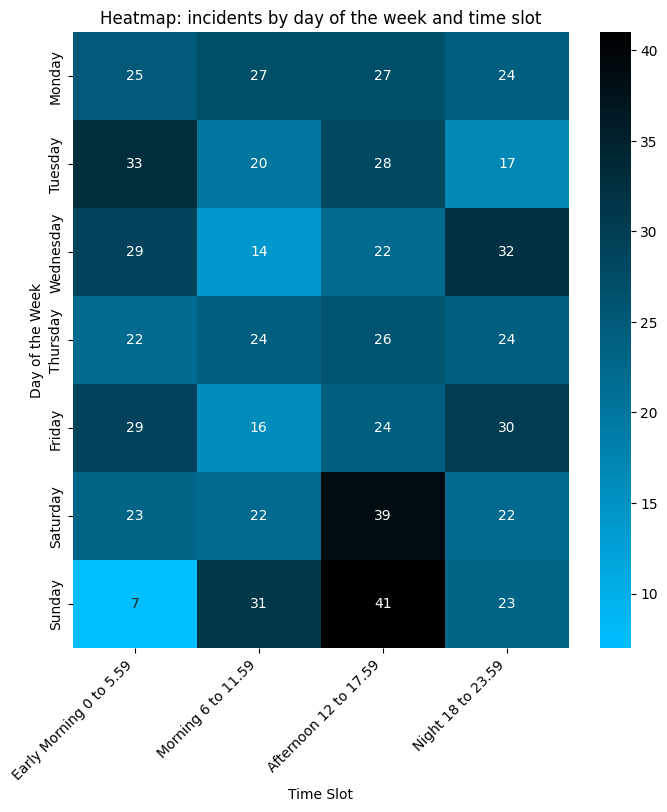

In [7]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents = df_accidents[df_accidents['Hr'] != 'SD']
df_accidents['Hr'] = pd.to_numeric(df_accidents['Hr'], errors='coerce')


def assign_time_slot(hour):
    if pd.isnull(hour):
        return None
    hour = int(hour)  
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df_accidents['Time Slot'] = df_accidents['Hr'].apply(assign_time_slot)
pivot_table = df_accidents.pivot_table(index='Weekday', columns='Time Slot', aggfunc='size', fill_value=0)

week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(week_days)

plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, cmap=cmap, annot=True, fmt='d', cbar=True)
plt.xlabel('Time Slot')
plt.ylabel('Day of the Week')
plt.title('Heatmap: incidents by day of the week and time slot')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Early Morning 0 to 5.59', 'Morning 6 to 11.59', 'Afternoon 12 to 17.59', 'Night 18 to 23.59'],rotation=45, ha='right') 
plt.show()


C:\Users\m_evi\AppData\Local\Temp\ipykernel_14300\1997467186.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Weekday', y='Num victims', data=data, palette=color_list)


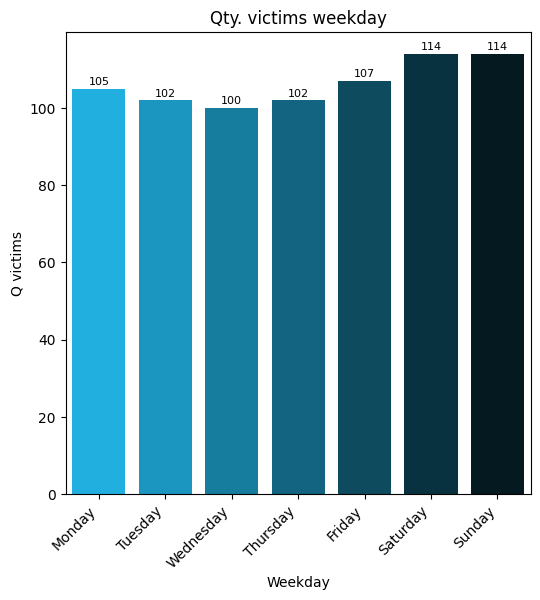

In [8]:

data = df_accidents.groupby(['Weekday'])['Num victims'].sum().reset_index()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

data['Order'] = data['Weekday'].apply(lambda x: order.index(x))
data = data.sort_values(by='Order')

plt.figure(figsize=(6,6))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])
num_colors = len(data['Weekday'].unique())
color_list = [cmap(i/num_colors) for i in range(num_colors)]
plt.xticks(rotation=45, ha='right') 

ax = sns.barplot(x='Weekday', y='Num victims', data=data, palette=color_list)
ax.set_title('Qty. victims weekday')
ax.set_xlabel('Weekday') ; ax.set_ylabel('Q victims')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

5.- Number of victims per month each year

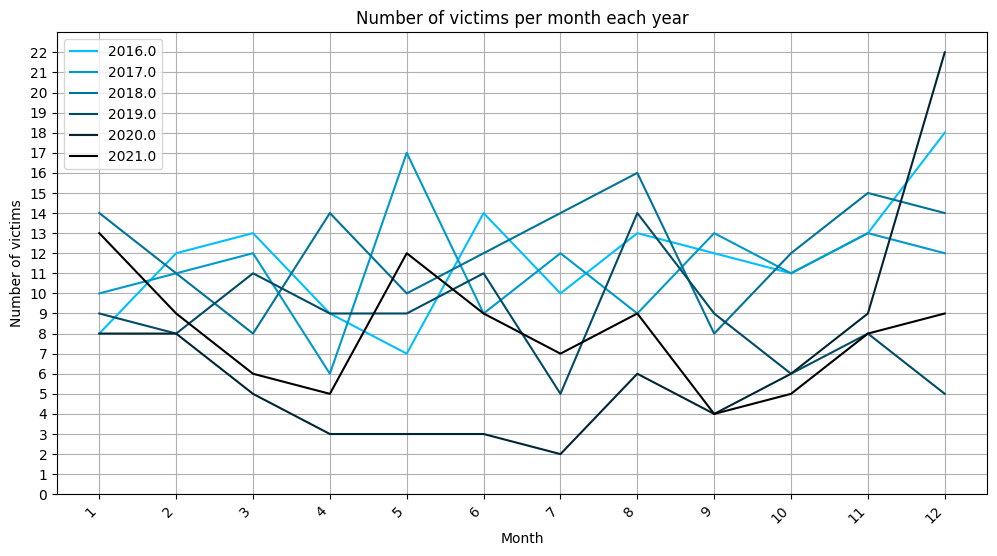

In [9]:

df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Year'] = df_accidents['Date'].dt.year
df_accidents['Month'] = df_accidents['Date'].dt.month

counts = df_accidents.groupby(['Year', 'Month']).size().unstack(fill_value=0)

cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])
years = counts.index
norm_years = (years - np.min(years)) / (np.max(years) - np.min(years))

colors = cmap(np.linspace(0, 1, len(years)))

plt.figure(figsize=(12, 6))
for year, colors in zip(years, colors):
    plt.plot(counts.columns, counts.loc[year], label=str(year), color=colors)

plt.xlabel('Month')
plt.ylabel('Number of victims')
plt.title('Number of victims per month each year')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13),rotation=45, ha='right')
plt.yticks(range(0, max(counts.values.max(), 1) + 1)) 

plt.show()
columns_to_drop = ['Year', 'Month']
df_accidents.drop(columns=columns_to_drop, inplace=True)


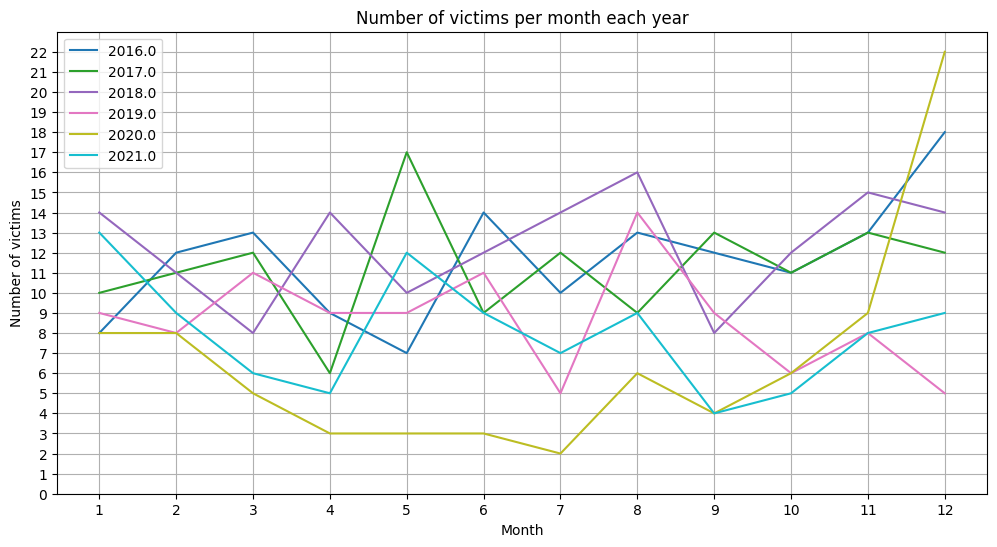

In [10]:
# Use a categorical colormap
cmap = plt.get_cmap('tab10')

years = counts.index
norm_years = (years - np.min(years)) / (np.max(years) - np.min(years))

colors = cmap(norm_years)
plt.figure(figsize=(12, 6))
for year, color in zip(years, colors):
    plt.plot(counts.columns, counts.loc[year], label=str(year), color=color)

plt.xlabel('Month')
plt.ylabel('Number of victims')
plt.title('Number of victims per month each year')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.yticks(range(0, max(counts.values.max(), 1) + 1)) 

plt.show()



6.- Accidents by Year and Gender

In [11]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             717 non-null    object        
 1   Role           717 non-null    object        
 2   Gender         717 non-null    object        
 3   Age            717 non-null    int64         
 4   Date of death  648 non-null    datetime64[ns]
 5   Age range      717 non-null    object        
 6   Num victims    717 non-null    int64         
 7   Date           702 non-null    datetime64[ns]
 8   Day            702 non-null    float64       
 9   Hr             701 non-null    float64       
 10  Street Tipe    702 non-null    object        
 11  Street         702 non-null    object        
 12  Croos          540 non-null    object        
 13  Commune        702 non-null    object        
 14  Pos X          702 non-null    float64       
 15  Pos Y          702 non-

In [12]:
df_accidents['Year'] = df_accidents['Date'].dt.year
resumen_sexo_año = df_accidents.groupby(['Year', 'Gender']).size().reset_index(name='Qty. accidents')
resumen_sexo_año


,Year,Gender,Qty. accidents
0,2016.0,FEMENINO,27
1,2016.0,MASCULINO,112
2,2016.0,SD,1
3,2017.0,FEMENINO,36
4,2017.0,MASCULINO,99
5,2018.0,FEMENINO,38
6,2018.0,MASCULINO,110
7,2019.0,FEMENINO,27
8,2019.0,MASCULINO,77
9,2020.0,FEMENINO,16


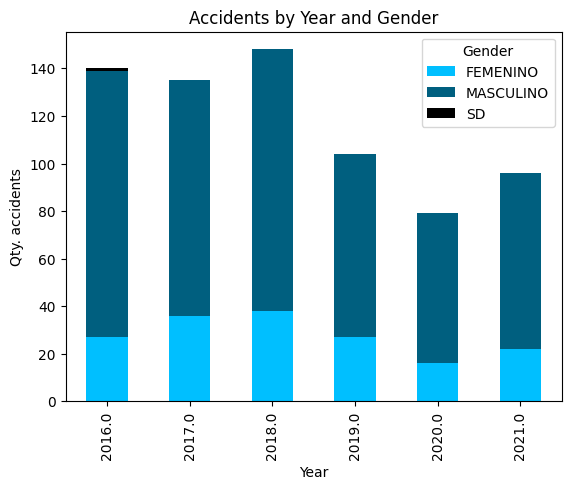

In [13]:
pivot_df = resumen_sexo_año.pivot(index='Year', columns='Gender', values='Qty. accidents')
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])

pivot_df.plot(kind='bar', stacked=True, colormap=cmap)

plt.xlabel('Year')
plt.ylabel('Qty. accidents')
plt.title('Accidents by Year and Gender')

plt.show()


In [14]:
commune_accidents = df_accidents.groupby('Commune')['Commune'].size()
print(commune_accidents.sort_values(ascending=False).head(10)) 


Commune
Commune 1     93
Commune 4     75
Commune 9     72
Commune 8     66
Commune 7     61
Commune 3     46
Commune 15    45
Commune 12    39
Commune 13    39
Commune 14    34
Name: Commune, dtype: int64


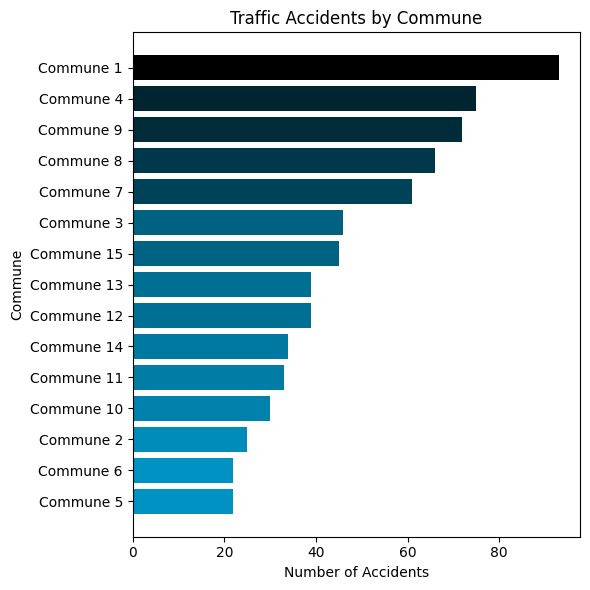

In [15]:
commune_accidents = df_accidents.groupby('Commune')['Commune'].size().reset_index(name='Accident Count')
sorted_data = commune_accidents.sort_values(by='Accident Count', ascending=True)
communes = sorted_data['Commune'].to_numpy()
accident_counts = sorted_data['Accident Count'].to_numpy()

plt.figure(figsize=(6, 6))
plt.barh(communes, accident_counts,color=cmap(accident_counts / accident_counts.max())) 
plt.xlabel('Number of Accidents')
plt.ylabel('Commune')
plt.title('Traffic Accidents by Commune')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()
